3. In the data package , the directory language_identification contains data for 5 languages. Based on this data, train an SVM classifier for language recognition between these 5 languages.

In [ ]:
!wget -nc http://dl.turkunlp.org/intro-to-nlp.tar.gz

File ‘intro-to-nlp.tar.gz’ already there; not retrieving.



In [ ]:
import tarfile

tf = tarfile.open("intro-to-nlp.tar.gz")
tf.extractall()
train_files = []
dev_files = []
for i in tf.getnames():
  if i[-5:] == 'n.txt':
    train_files.append(i)
    print(i)
  elif i[-5:] in 'l.txt':
    dev_files.append(i)
    print(i)

intro-to-nlp/language-identification/et_train.txt
intro-to-nlp/language-identification/fi_train.txt
intro-to-nlp/language-identification/fi_devel.txt
intro-to-nlp/language-identification/et_devel.txt
intro-to-nlp/language-identification/es_train.txt
intro-to-nlp/language-identification/pt_train.txt
intro-to-nlp/language-identification/es_devel.txt
intro-to-nlp/language-identification/pt_devel.txt
intro-to-nlp/language-identification/en_devel.txt
intro-to-nlp/language-identification/en_train.txt


In [ ]:
train_files

['intro-to-nlp/language-identification/et_train.txt',
 'intro-to-nlp/language-identification/fi_train.txt',
 'intro-to-nlp/language-identification/es_train.txt',
 'intro-to-nlp/language-identification/pt_train.txt',
 'intro-to-nlp/language-identification/en_train.txt']

In [ ]:
# Train features
all_texts = []
all_labels = []

#Test features
dev_texts = []
dev_labels = []

for i in train_files:
  language_sample = []
  language_label = []
  with open(i) as f:
    for line in f:
      language_sample.append(line.rstrip('\n'))
      language_label.append(i[-12:-10])
  all_texts += language_sample
  all_labels += language_label

  for i in dev_files:
    dev_sample = []
    dev_label = []
    with open(i) as f:
      for line in f:
        dev_sample.append(line.rstrip('\n'))
        dev_label.append(i[-12:-10])
    dev_texts += dev_sample
    dev_labels += dev_labels

  for i in range(0,len(all_texts),1000):
    print("label for language:", all_labels[i])
    print("text:", all_texts[i], "\n")

label for language: et
text: Peugeot 307, mida juhtis 1963. aastal sündinud Viktor, sõitis teelt välja vastu puud. 

label for language: et
text: Peugeot 307, mida juhtis 1963. aastal sündinud Viktor, sõitis teelt välja vastu puud. 

label for language: fi
text: Kahvi maistui silmien lievältä kirvelyltä. 

label for language: et
text: Peugeot 307, mida juhtis 1963. aastal sündinud Viktor, sõitis teelt välja vastu puud. 

label for language: fi
text: Kahvi maistui silmien lievältä kirvelyltä. 

label for language: es
text: Así, de 1892 a 1894 datan sus creaciones más reveladoras, todas para orquesta. 

label for language: et
text: Peugeot 307, mida juhtis 1963. aastal sündinud Viktor, sõitis teelt välja vastu puud. 

label for language: fi
text: Kahvi maistui silmien lievältä kirvelyltä. 

label for language: es
text: Así, de 1892 a 1894 datan sus creaciones más reveladoras, todas para orquesta. 

label for language: pt
text: Ele sabe que não lhe dei o meu voto. 

label for language: et

In [ ]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split #split data
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,1))

train_texts, dev_texts, train_labels, dev_labels=train_test_split(all_texts,all_labels,test_size=0.2)
feature_matrix_train = vectorizer.fit_transform(all_texts)
feature_matrix_dev = vectorizer.transform(dev_texts)

In [ ]:
print(feature_matrix_train.shape)
print(feature_matrix_dev.shape)

(5000, 28620)
(1000, 28620)


In [ ]:
#LabelEncoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
transformed_labels = le.fit_transform(all_labels)
dev_transformed_labels = le.transform(dev_labels)

In [ ]:
import sklearn.svm
classifier=sklearn.svm.LinearSVC(C=0.0005,verbose=1)
classifier.fit(feature_matrix_train,transformed_labels)

[LibLinear]

LinearSVC(C=0.0005, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=1)

In [ ]:
print("DEV",classifier.score(feature_matrix_dev, dev_transformed_labels))
print("TRAIN",classifier.score(feature_matrix_train, transformed_labels))

DEV 0.891
TRAIN 0.889


4. Toy around with features, especially the ngram_range and analyzer parameters, which allow you to test classification based on character ngrams of various lengths. Gain some insight into the accuracy of the classifier with different features and comment on your findings.

In [ ]:
ngram = list(range(1,5))
c_param = [0.0005, 0.005, 0.05, 0.5]
dev_score = []
for n in ngram:
  for c in c_param:
    vectorizer1 = CountVectorizer(ngram_range=(n,n))
    feature_matrix_train1 = vectorizer.fit_transform(all_texts)
    feature_matrix_dev1 = vectorizer.transform(dev_texts)
    classifier1=sklearn.svm.LinearSVC(C=c,verbose=1)
    classifier1.fit(feature_matrix_train1,transformed_labels)
    dev_score.append(classifier1.score(feature_matrix_dev1, dev_transformed_labels))
    print(f"Accuracy score with ngram = {n} and c_param = {c} as parameter:")
    print(f"\tDEV: {classifier1.score(feature_matrix_dev1, dev_transformed_labels)}")
    print(f"\tTRAIN: {classifier1.score(feature_matrix_train1, transformed_labels)}\n")

[LibLinear]Accuracy score with ngram = 1 and c_param = 0.0005 as parameter:
	DEV: 0.891
	TRAIN: 0.889

[LibLinear]Accuracy score with ngram = 1 and c_param = 0.005 as parameter:
	DEV: 0.953
	TRAIN: 0.945

[LibLinear]Accuracy score with ngram = 1 and c_param = 0.05 as parameter:
	DEV: 0.997
	TRAIN: 0.9954

[LibLinear]Accuracy score with ngram = 1 and c_param = 0.5 as parameter:
	DEV: 1.0
	TRAIN: 0.9996

[LibLinear]Accuracy score with ngram = 2 and c_param = 0.0005 as parameter:
	DEV: 0.891
	TRAIN: 0.889

[LibLinear]Accuracy score with ngram = 2 and c_param = 0.005 as parameter:
	DEV: 0.953
	TRAIN: 0.945

[LibLinear]Accuracy score with ngram = 2 and c_param = 0.05 as parameter:
	DEV: 0.997
	TRAIN: 0.9954

[LibLinear]Accuracy score with ngram = 2 and c_param = 0.5 as parameter:
	DEV: 1.0
	TRAIN: 0.9996

[LibLinear]Accuracy score with ngram = 3 and c_param = 0.0005 as parameter:
	DEV: 0.891
	TRAIN: 0.889

[LibLinear]Accuracy score with ngram = 3 and c_param = 0.005 as parameter:
	DEV: 0.95

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

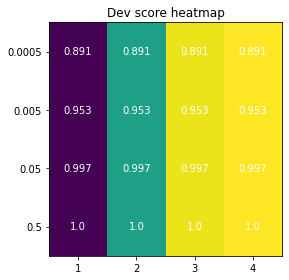

In [ ]:
scores = np.array(dev_score).reshape(4, 4)
fig, ax = plt.subplots()
im = ax.imshow(scores)
ax.set_xticks(np.arange(len(c_param)))
ax.set_yticks(np.arange(len(ngram)))
ax.set_xticklabels(ngram)
ax.set_yticklabels(c_param)
for i in range(len(c_param)):
    for j in range(len(ngram)):
      text =  ax.text(i,j, scores[i,j],
                    ha = "center", va = "center", color = "white")
ax.set_title("Dev score heatmap")
fig.tight_layout()
plt.show()

#Conclusions:

1. N-gram does not make any influence on the final results.
2. C-param does make effort to train the data for better accuracy.
3. with C-param = 0.5, train and test score showed over-fitting.

5. Obtain the learning curve of the classifier, i.e. the accuracy with respect to a varying amount of training data. How little data can you use for training, and still obtain reasonable results? I leave it up to you which dataset you choose, IMDB or languages or any other data you find interesting.

In [ ]:
def training_data(n):
  accuracy_score = []
  for p in range(5,n,10):
    n_training = []
    n_labels = []
    n_each = int(p/3)
    for e in train_files:
      language_sample = []
      language_label = []
      with open(e) as f:
        for line in f:
          if len(language_sample) < n_each:
            language_sample.append(line.rstrip('\n'))
            language_label.append(e[-12:-10])
          else:
            continue
      n_training += language_sample
      n_labels += language_label
    
    # label encoding
    n_transformed_labels = le.fit_transform(n_labels)
    n_dev_transformed_labels = le.transform(dev_labels)

    #building model
    vectorizer2 = CountVectorizer(ngram_range=(1,1))
    feature_matrix_train2 = vectorizer2.fit_transform(n_training)
    feature_matrix_dev2 = vectorizer2.transform(dev_texts)
    classifier2 = sklearn.svm.LinearSVC(C=0.5,verbose=1)
    classifier2.fit(feature_matrix_train2, n_transformed_labels)
    accuracy_score.append(classifier2.score(feature_matrix_dev2, n_dev_transformed_labels))

# create a numpy array "m_values" containing the values 1,2...,max_m
  m_values = np.arange(5, n, 10)
  fig2, axes2 = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
  axes2.plot(m_values, accuracy_score, label='Accuracy', color='blue')
  axes2.set_xlabel('Number of data points')
  axes2.set_ylabel('Accuracy')
  axes2.set_title('Accuracy vs. number of data points')
  axes2.legend()
  plt.tight_layout()
  plt.show()

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear

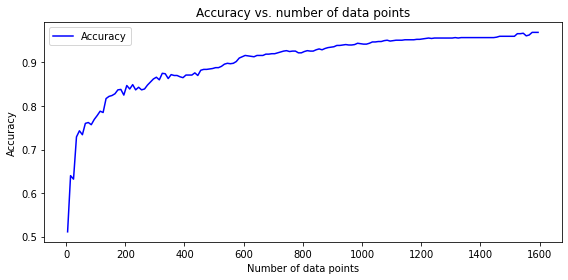

In [ ]:
# Learning curve with 1599 training data.
training_data(1599)

# Conclusions:

1. The first 200 training data, the accuracy has a steep increace. About 200 training data point have great influence on the learning curve of the classification. 
2. After that, from 200-400 training data, the data accuracy improved, over 80% accuracy.
3. About 0-400/600 training data points could be regarded as good amount of data for data classification.  